In [10]:
import torch
from torch import nn
from py09_FashionMNIST_Dataset import load_data_fashion_mnist,get_fashion_mnist_labels
from deeplearn_tools import *

In [3]:
batch_size=256
train_iter,test_iter = load_data_fashion_mnist(batch_size)

In [4]:
num_inputs = 784
num_hiddens = 256
num_outputs = 10
net = nn.Sequential(nn.Flatten(),nn.Linear(num_inputs,num_hiddens),nn.ReLU(),nn.Linear(num_hiddens,num_outputs))

In [5]:
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
loss = nn.CrossEntropyLoss()

In [9]:
lr = 0.1
Optimzier = torch.optim.SGD(net.parameters(),lr=lr)

In [12]:
def accuracy(y_hat,y):
    predict = y_hat.argmax(dim=1)
    cmp = predict.reshape(y.shape).type(y.dtype)== y
    return float(cmp.sum())

In [13]:
def evaluate_accuracy(net,test_iter):
    metric = Accumulator(2)
    for x,y in test_iter:
        y_hat = net(x)
        metric.add(accuracy(y_hat,y),y.numel())
    return metric[0]/metric[1]
    

In [15]:
def train(net,loss,Optimzier,train_iter,test_iter,num_epochs):
    legend = ['train_loss','train_acc','test_acc']
    anim = Animator(xlabel='num_epochs', ylabel=None, legend=legend, xlim=[1,num_epochs], ylim=[0,1])
    for epoch in range(num_epochs):
        metric = Accumulator(3)
        for x,y in train_iter:
            y_hat = net(x)
            l = loss(y_hat,y)
            Optimzier.zero_grad()
            l.backward()
            Optimzier.step()
            metric.add(float(l)*len(y),accuracy(y_hat,y),y.numel())
        train_loss,train_acc = metric[0]/metric[2],metric[1]/metric[2]
        test_acc = evaluate_accuracy(net,test_iter)
        anim.add(epoch+1,[train_loss,train_acc,test_acc]) 

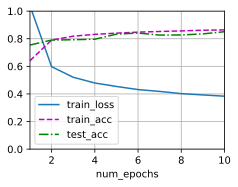

In [16]:
num_epochs=10
train(net,loss,Optimzier,train_iter,num_epochs)

In [19]:
def predict(test_iter):
    for x,y in test_iter:
        break
    y_hat = net(x)
    num_rows = 2
    num_cols = 6
    n = num_rows * num_cols
    predicts = get_fashion_mnist_labels(y_hat.argmax(dim=1))
    truths = get_fashion_mnist_labels(y)
    titles = [truth+'\n'+predict for truth,predict in zip(truths,predicts)]
    image_show(x[0:n].reshape(-1,28,28),num_rows=num_rows,num_cols=num_cols,titles=titles)

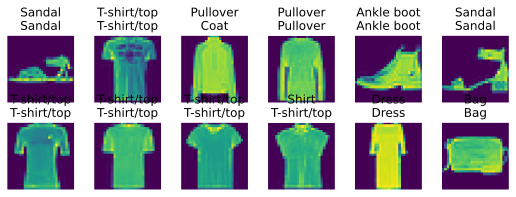

In [20]:
predict(test_iter)